In [1]:
import pandas as pd
from evaluation_scenario import EvaluationScenario, EvaluationScenarioCollection, EvaluationUtils, EvaluationMetrics
from evaluation_utils import get_all_files_in_path

In [2]:
evaluations_paths: str = '../evaluation/all'

In [3]:
evaluation_file_paths: list[str] = get_all_files_in_path(evaluations_paths, '.csv')

In [4]:
evaluation_file_paths

['../evaluation/all/util_lstm_train_with_penalty_loss.csv',
 '../evaluation/all/loss_progression_with_tasks.csv',
 '../evaluation/all/loss_progression_with_no_tasks.csv',
 '../evaluation/all/loss_progression_with_small_batch_size.csv',
 '../evaluation/all/util_lstm_train_with_small_batch_size.csv',
 '../evaluation/all/util_lstm_train_with_no_tasks.csv',
 '../evaluation/all/util_lstm_test_with_small_batch_size.csv',
 '../evaluation/all/util_lstm_train_with_medium_batch_size.csv',
 '../evaluation/all/util_lstm_train_with_instances.csv',
 '../evaluation/all/loss_progression_with_medium_batch_size.csv',
 '../evaluation/all/loss_progression_with_penalty_loss.csv',
 '../evaluation/all/util_lstm_test_with_tasks.csv',
 '../evaluation/all/util_lstm_train_with_rmse_loss.csv',
 '../evaluation/all/loss_progression_with_instances.csv',
 '../evaluation/all/util_lstm_test_with_instances.csv',
 '../evaluation/all/util_lstm_test_with_no_tasks.csv',
 '../evaluation/all/loss_progression_with_rmse_loss.cs

In [5]:
evaluation_collection = EvaluationScenarioCollection(evaluation_file_paths)
evaluations: dict[str, EvaluationScenario] = evaluation_collection.evaluation_collection

In [6]:
evaluations

{'with_penalty_loss': EvaluationScenario(name='with_penalty_loss'),
 'with_tasks': EvaluationScenario(name='with_tasks'),
 'with_no_tasks': EvaluationScenario(name='with_no_tasks'),
 'with_small_batch_size': EvaluationScenario(name='with_small_batch_size'),
 'with_medium_batch_size': EvaluationScenario(name='with_medium_batch_size'),
 'with_instances': EvaluationScenario(name='with_instances'),
 'with_rmse_loss': EvaluationScenario(name='with_rmse_loss'),
 'with_large_batch_size': EvaluationScenario(name='with_large_batch_size')}

In [18]:
no_tasks_eval: EvaluationScenario = evaluations['with_no_tasks']
with_tasks_eval: EvaluationScenario = evaluations['with_tasks']
with_instances_eval: EvaluationScenario = evaluations['with_instances']
with_penalty_eval: EvaluationScenario = evaluations['with_penalty_loss']

evaluation_list: list[EvaluationScenario] = [no_tasks_eval, with_tasks_eval, with_instances_eval, with_penalty_eval]

In [8]:
with_small_batch_eval: EvaluationScenario = evaluations['with_small_batch_size']
with_medium_batch_eval: EvaluationScenario = evaluations['with_medium_batch_size']
with_large_batch_eval: EvaluationScenario = evaluations['with_large_batch_size']

<AxesSubplot:>

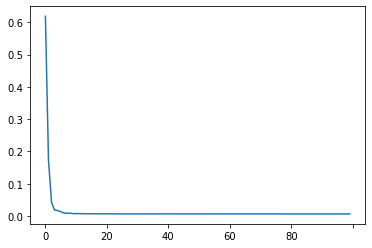

In [11]:
no_tasks_eval.get_loss_series()

<AxesSubplot:>

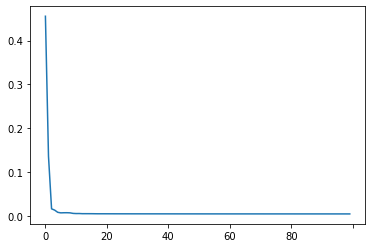

In [12]:
with_tasks_eval.get_loss_series()

In [51]:
loss_df: pd.DataFrame = pd.DataFrame(data=[eval.get_loss_series() for eval in evaluation_list], index=[eval.name for eval in evaluation_list])
training_df: pd.DataFrame = pd.DataFrame(data=[eval.get_training_time_series() for eval in evaluation_list], index=[eval.name for eval in evaluation_list])

In [59]:
loss_df.transpose().describe()

,with_no_tasks,with_tasks,with_instances,with_penalty_loss
count,100.000000,100.000000,100.000000,100.000000
mean,0.015376,0.010729,0.015204,0.017239
std,0.063238,0.046830,0.087523,0.089312
min,0.006771,0.004423,0.004066,0.005711
25%,0.006800,0.004462,0.004094,0.005931
50%,0.006853,0.004519,0.004159,0.006035
75%,0.006963,0.004658,0.004402,0.006328
max,0.618601,0.455552,0.869226,0.890990


In [64]:
training_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
with_no_tasks,2.565120,2.253248,2.333392,2.343554,2.286338,2.380280,2.286885,2.278762,2.550892,2.330532,...,2.324643,2.461544,2.410812,2.330715,2.472698,2.376855,2.349579,2.510087,2.399146,2.299107
with_tasks,2.689758,2.354043,2.494981,2.264600,2.402554,2.449773,2.399804,2.507748,2.186895,2.443986,...,2.355612,2.303922,2.385484,2.387487,2.275026,2.266495,2.321701,2.346961,2.344471,2.237451
with_instances,2.599348,2.169696,2.269222,2.300601,2.230183,2.273550,2.385047,2.358978,2.326625,2.360580,...,2.310119,2.276816,2.376158,2.280592,2.247723,2.324217,2.313639,2.388379,2.299270,2.371502
with_penalty_loss,2.893040,2.332694,2.329393,2.309979,2.400788,2.441980,2.355844,2.454944,2.356948,2.449204,...,2.504669,2.424406,2.323186,2.347662,2.305288,2.414257,2.305414,2.447799,2.473414,2.385952


In [63]:
print(training_df.transpose().describe().round(4).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  with\_no\_tasks &  with\_tasks &  with\_instances &  with\_penalty\_loss \\
\midrule
count &       100.0000 &    100.0000 &        100.0000 &           100.0000 \\
mean  &         2.3487 &      2.3853 &          2.3042 &             2.4001 \\
std   &         0.0729 &      0.0949 &          0.0621 &             0.0922 \\
min   &         2.2285 &      2.1869 &          2.1697 &             2.2086 \\
25\%   &         2.2992 &      2.3263 &          2.2709 &             2.3438 \\
50\%   &         2.3319 &      2.3759 &          2.3091 &             2.3788 \\
75\%   &         2.3922 &      2.4442 &          2.3353 &             2.4506 \\
max   &         2.5651 &      2.6898 &          2.5993 &             2.8930 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_67572/2780188355.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(training_df.transpose().describe().round(4).to_latex())
